In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("financial_lending .csv")

df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col] = df[col].fillna(df[col].median())

df.reset_index(drop=True, inplace=True)

print(" Shape of dataset:", df.shape)
print("\n Column Names:\n", df.columns.tolist())
print("\n Missing Values After Cleaning:\n", df.isnull().sum())
print("\n First 5 rows:")
print(df.head())
print("\n Statistical Summary:")
print(df.describe())
print(df.tail())
print(df.columns)




 Shape of dataset: (614, 13)

 Column Names:
 ['application_id', 'applicant_gender', 'is_married', 'num_dependents', 'education_level', 'is_self_employed', 'primary_income', 'secondary_income', 'loan_amount_requested', 'term_duration_months', 'has_credit_history', 'residence_area', 'approval_status']

 Missing Values After Cleaning:
 application_id           0
applicant_gender         0
is_married               0
num_dependents           0
education_level          0
is_self_employed         0
primary_income           0
secondary_income         0
loan_amount_requested    0
term_duration_months     0
has_credit_history       0
residence_area           0
approval_status          0
dtype: int64

 First 5 rows:
  application_id applicant_gender is_married num_dependents education_level  \
0       LP001002             Male         No              0        Graduate   
1       LP001003             Male        Yes              1        Graduate   
2       LP001005             Male        Yes   

In [3]:
df.info

<bound method DataFrame.info of     application_id applicant_gender is_married num_dependents education_level  \
0         LP001002             Male         No              0        Graduate   
1         LP001003             Male        Yes              1        Graduate   
2         LP001005             Male        Yes              0        Graduate   
3         LP001006             Male        Yes              0    Not Graduate   
4         LP001008             Male         No              0        Graduate   
..             ...              ...        ...            ...             ...   
609       LP002978           Female         No              0        Graduate   
610       LP002979             Male        Yes             3+        Graduate   
611       LP002983             Male        Yes              1        Graduate   
612       LP002984             Male        Yes              2        Graduate   
613       LP002990           Female         No              0        Graduate

In [4]:
df.isnull().sum


<bound method DataFrame.sum of      application_id  applicant_gender  is_married  num_dependents  \
0             False             False       False           False   
1             False             False       False           False   
2             False             False       False           False   
3             False             False       False           False   
4             False             False       False           False   
..              ...               ...         ...             ...   
609           False             False       False           False   
610           False             False       False           False   
611           False             False       False           False   
612           False             False       False           False   
613           False             False       False           False   

     education_level  is_self_employed  primary_income  secondary_income  \
0              False             False           False          

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
target_col = "approval_status"
X = df.drop(columns=[target_col])
y = df[target_col]
# Encode categorical columns
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])
# Encode target if it's categorical
if y.dtype == 'object':
    y = le.fit_transform(y)
#  Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#  Make predictions
y_pred = log_reg.predict(X_test)

#  Evaluate model performance
print(" Model Evaluation Results")
print("----------------------------")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Model Evaluation Results
----------------------------
Accuracy Score: 0.7886

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model Evaluation Results
----------------------------
Accuracy Score: 0.8211

Confusion Matrix:
 [[21 17]
 [ 5 80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123

ROC-AUC Score: 0.8031


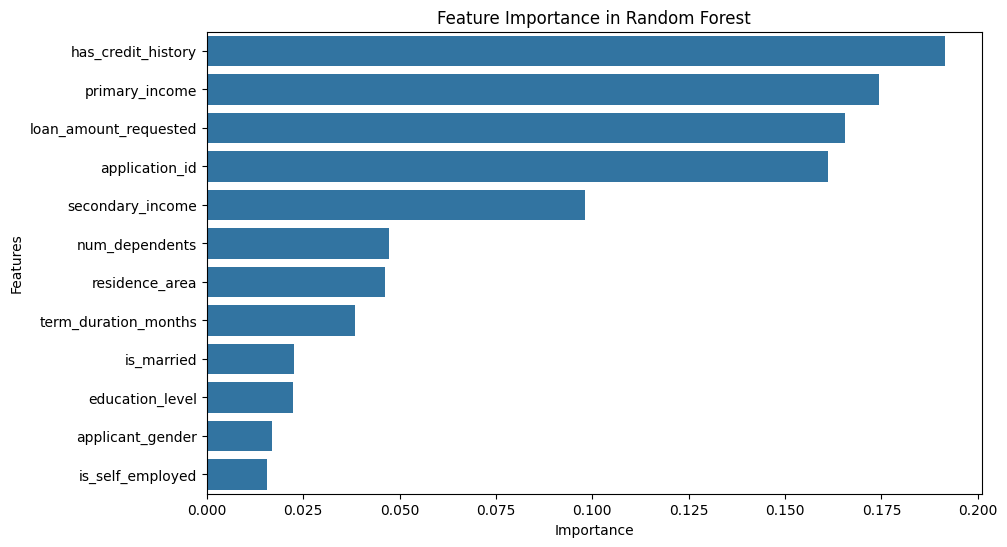

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Identify features & target
target_col = "approval_status"
X = df.drop(columns=[target_col])
y = df[target_col]
# Step 2: Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Encode target if it's categorical
if y.dtype == 'object':
    y = le.fit_transform(y)
# Step 3: Feature scaling (optional for Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
# Step 5: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # balances class 0 and 1
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
# Step 6: Train Random Forest with best parameters
rf_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
# Step 7: Predictions & Evaluation

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # for ROC-AUC

print("\nModel Evaluation Results")
print("----------------------------")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Step 8: Feature Importance Visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Model Evaluation Results
----------------------------
Accuracy Score: 0.8537

Confusion Matrix:
 [[21 17]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

ROC-AUC Score: 0.8118


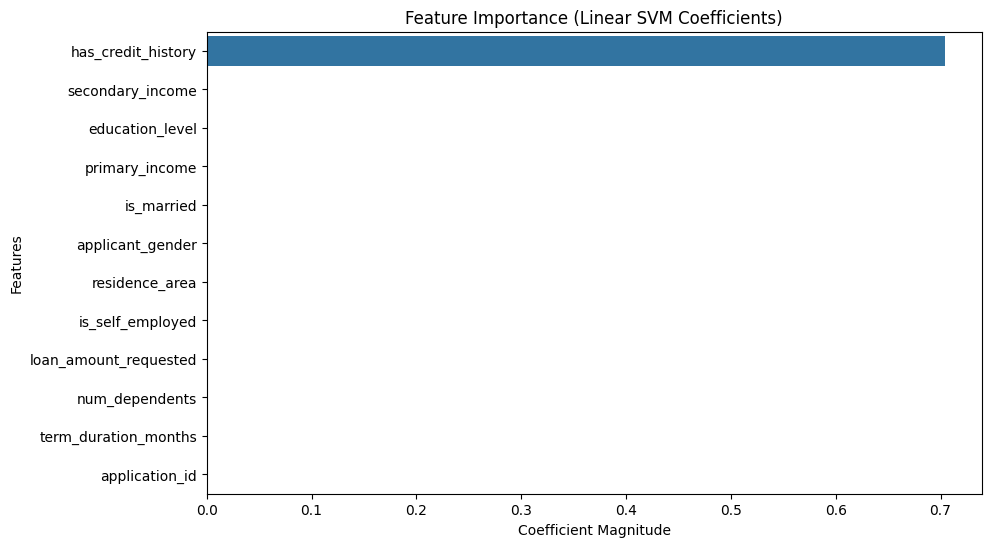

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Identify features & target
target_col = "approval_status"
X = df.drop(columns=[target_col])
y = df[target_col]
# Step 2: Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Encode target if it's categorical
if y.dtype == 'object':
    y = le.fit_transform(y)
# Step 3: Feature Scaling (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
# Step 5: Hyperparameter Tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': ['scale', 'auto']      # Kernel coefficient
}

grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),  # enable probability for ROC-AUC
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
# Step 6: Train SVM with best parameters
svm_model = SVC(
    C=grid_search.best_params_['C'],
    kernel=grid_search.best_params_['kernel'],
    gamma=grid_search.best_params_['gamma'],
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)

# Step 7: Predictions & Evaluation
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # for ROC-AUC
print("\nModel Evaluation Results")
print("----------------------------")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
# Step 8: Feature Importance (using coefficients for linear SVM)
if grid_search.best_params_['kernel'] == 'linear':
    feature_importances = pd.Series(
        abs(svm_model.coef_[0]), index=X.columns
    ).sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title("Feature Importance (Linear SVM Coefficients)")
    plt.xlabel("Coefficient Magnitude")
    plt.ylabel("Features")
    plt.show()
else:
    print("\nFeature importance is not directly interpretable for non-linear kernels.")
